In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

#I followed video here https://www.youtube.com/watch?v=COUWKVf6zKY to help walk me through concepts: https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

['submission.csv', 'test.csv', 'train.csv']


In [5]:
# Let's take a look at the data and load the train
titanic_train_file_path = 'input/train.csv'
train = pd.read_csv(titanic_train_file_path)
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# load test data
titanic_test_file_path = 'input/test.csv'
test=pd.read_csv(titanic_test_file_path)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# look at data for train
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#using .shape will tell you row and col
train.shape

(891, 12)

In [10]:
test.shape

(418, 11)

In [11]:
#.info() will tell you schema and row count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# will find the nulls in the fields and sum them
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# here is where i take a look at that data and see what trends I can find using bar charts
#This is good to critique the data early to see if you can gain insights on what variables
#to use
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked = True, figsize=(10,5))

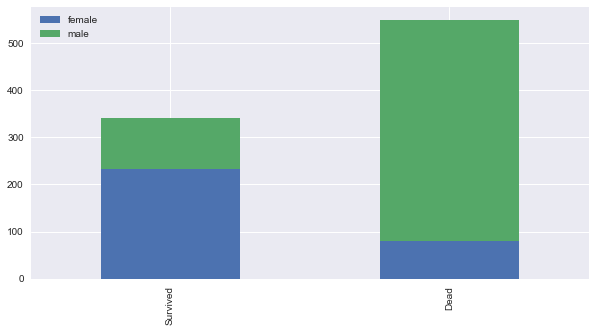

In [15]:
bar_chart('Sex')

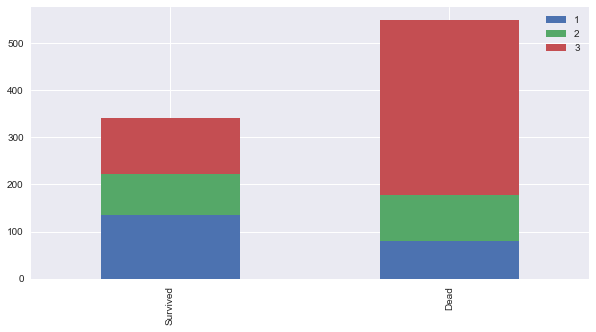

In [16]:
bar_chart('Pclass')

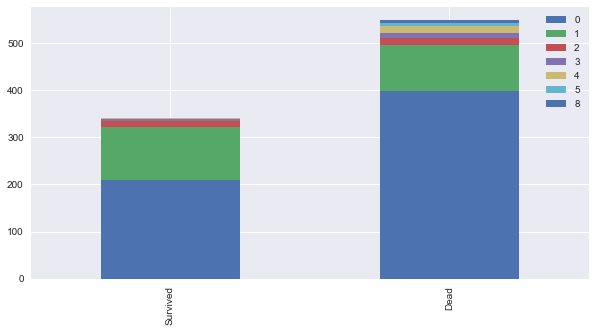

In [17]:
bar_chart('SibSp')

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#Feature Engineering


from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [20]:
#Combine train and test to extract the title
train_test = [train,test]
for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Lady          1
Ms            1
Capt          1
Sir           1
Mme           1
Don           1
Countess      1
Name: Title, dtype: int64

In [22]:
#Lets map the title to value for usin in algo
#Mr=0,Miss=1,Mrs=2,Others=3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


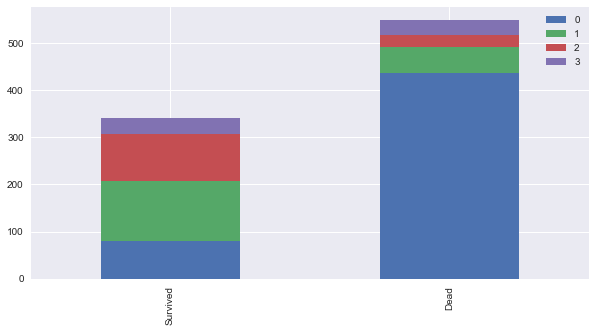

In [24]:
bar_chart('Title')

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [26]:
#need to perform the same style mapping that was doen for the title but this time we will do it for sex
sex_mapping = {"male":0,
              "female":1}
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


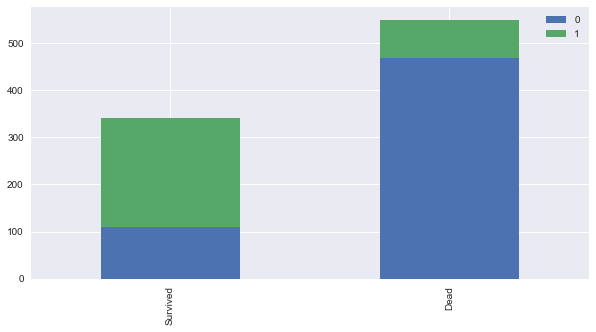

In [28]:
bar_chart("Sex")

In [29]:
#Since Age is NUll in some areas, what we'll is use the median value of the age for the title
#to fill in the blanks using the .fillna function 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


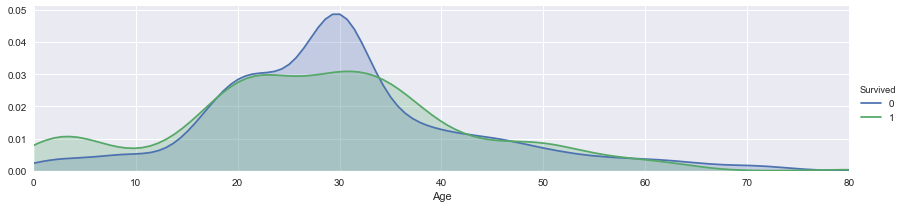

In [31]:
#Lets plot it using a FacetGraph
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()
plt.show()

In [32]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 0, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 0) & (dataset['Age'] <= 5), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 12), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Age'] = 5,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 6

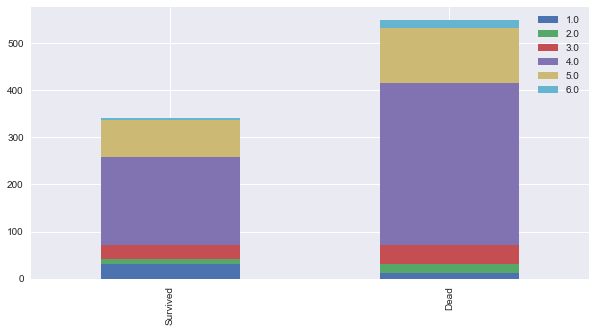

In [33]:
bar_chart('Age')

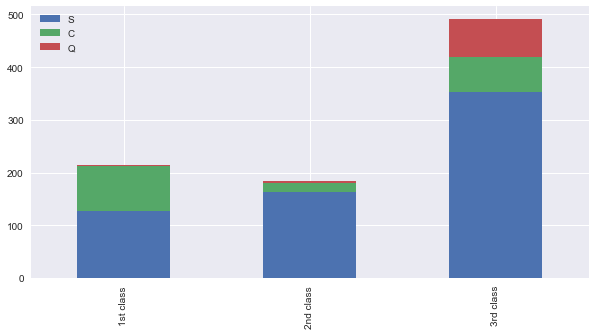

In [34]:
#Going to take a look at Embarked

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [35]:
#Since a majority of embarkation happened from S, Let's fill that out
for dataset in train_test:    
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,4.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,4.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,S,0


In [37]:
#Let map embarked now too!
embarked_mapping = {"S":0,
                   "C":1,
                   "Q":2}

for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [38]:
#time to fill in Fare now
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,4.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,4.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,4.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,1.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,4.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,3.0,1,0,237736,30.0708,NaN,1,2


In [39]:
# use binning to classify the Fare
for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,4.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,4.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,0.0,NaN,0,0


In [41]:
#Last let looks at cabin
train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
D                  3
F33                3
E101               3
C22 C26            3
F2                 3
B51 B53 B55        2
D36                2
D26                2
C124               2
C92                2
E25                2
C68                2
E44                2
E33                2
B49                2
B57 B59 B63 B66    2
B35                2
C78                2
B58 B60            2
B77                2
E24                2
E8                 2
D20                2
D33                2
B18                2
C93                2
C65                2
                  ..
B39                1
B94                1
A14                1
A24                1
C95                1
C46                1
C90                1
A10                1
D21                1
C47                1
B78                1
B71                1
C99                1
B3                 1
B38                1
D56                1
A31          

In [42]:
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

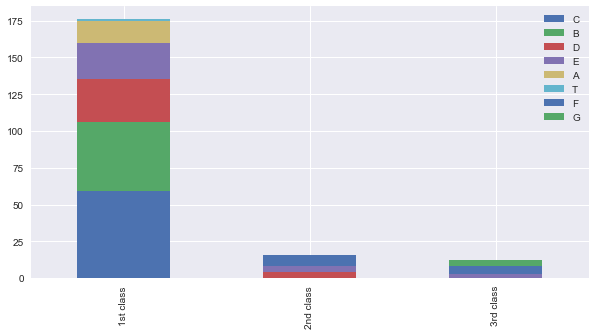

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [44]:
#DO the mapping

cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [45]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [46]:
#Forgot about Family Size
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

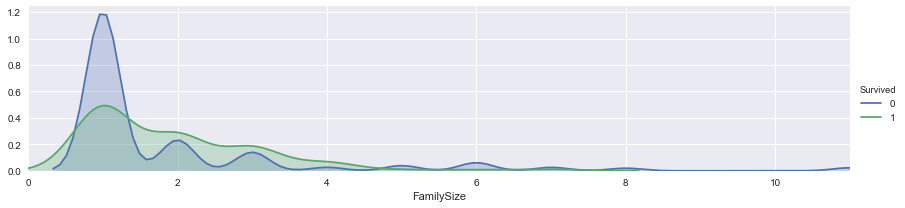

In [47]:
#Map family
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [48]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,4.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,4.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,4.0,0,0,373450,0.0,2.0,0,0,0.0


In [50]:
#time to cleanup
features_drop = ['Name','Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [51]:
train = train.drop(['PassengerId'], axis=1)

In [52]:
#train = train.drop(['PassengerId'], axis=1)
train_data = train.drop('Survived', axis=1)
target = train['Survived']


train_data.shape, target.shape

((891, 8), (891,))

In [53]:
train_data.head(10)


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,4.0,0.0,2.0,0,0,0.4
1,1,1,5.0,2.0,0.8,1,2,0.4
2,3,1,4.0,0.0,2.0,0,1,0.0
3,1,1,4.0,2.0,0.8,0,2,0.4
4,3,0,4.0,0.0,2.0,0,0,0.0
5,3,0,4.0,0.0,2.0,2,0,0.0
6,1,0,5.0,2.0,1.6,0,0,0.0
7,3,0,1.0,1.0,2.0,0,3,1.6
8,3,1,4.0,0.0,2.0,0,2,0.8
9,2,1,3.0,2.0,1.8,1,2,0.4


In [54]:
#*******************MODELLING******************#

In [55]:

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [56]:
#need to splits data for cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [57]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.81111111 0.79775281 0.83146067 0.83146067 0.83146067 0.79775281
 0.84269663 0.80898876 0.82022472 0.84269663]


In [58]:
#kNN Scrore - find the average of the 10 that were returned
round(np.mean(score)*100,2)

82.16

In [59]:
#Lets check DecisionTree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.88764045 0.75280899 0.79775281 0.85393258 0.83146067
 0.83146067 0.80898876 0.75280899 0.79775281]


In [60]:
round(np.mean(score)*100,2)

81.15

In [61]:
#RandomForest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.87640449 0.76404494 0.83146067 0.87640449 0.83146067
 0.83146067 0.80898876 0.7752809  0.80898876]


In [62]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.93

In [63]:
#Naive Bayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.73033708 0.76404494 0.76404494 0.69662921 0.80898876
 0.70786517 0.79775281 0.83146067 0.83146067]


In [64]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.55

In [65]:
#SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.83146067 0.80898876
 0.84269663 0.84269663 0.83146067 0.84269663]


In [66]:
#SVM score
round(np.mean(score)*100,2)

82.94

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [69]:
#TESTING

clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [70]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [71]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
